# Classification and Regression, from linear and logistic regression to neural networks

## Regression:
Bring back regression code from project 1 (reference own work in bibliography) and compare to results from FFNN
Data can be:
- simple 1d
- Franke
- anything
But start with something simple

## Classification:
Develop a logistic regression code and compare to FFNN.
Proposed data set:
- Wisconsin Breast Cancer Data (images representing various tumor features)
- Andre data (men pass på at kan diskutere resultatene mot literature)


## Part a) Write own Stochastic Gradient Descent Code: First step
Replace matrix inversion from OLS and Ridge with GD and SGD
Data can be either
- Franke
- Terrain 
- Recommended: something simple like for instance: f(x) = ao + a1x + a2x^2
look at exercises from week 41 for help

## Analyse the GD and SGD code. This should include:
(Lecture notes week 39 and 40 contain examples it is ok to use)
### 1: plain gradient descent with fixed learning rate (tune it) using the analytical expression for the gradient
### 2: Add momentum to the plain GD code and compare convergence with a fixed learning rate (may need to tune it). Keep using the analytical expression for the gradient
### 3: Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. Use a tunable learning rate (lectures week 39 and 40). Discuss the results as functions of the various parameters (size of batches, nr of epochs etc). Use the analytical gradient
### 4: Implement the adagrad method in order to tune the learning rate. Do this with and without momentum for plain gradient descent and SGD
### 5: Add RMSprop and Adam to your library of methods for tuning the learning rate
### 6: Replace thereafter your analytical gradient with either Autograd or JAX

## Part b) Writing your own neural network code (Central part of the project)
Implement back propagation algorithm discussed in lectures week 41 and 42
### Regression problem first: Can use simple 2nd order poly from part a, Franke or terrain. Discuss choice of cost fcn
Write a FFNN with a flexible nr of hidden layers and nodes using the sigmoid fcn as activation fcn for the hidden layers. Initialise the weights using a normal distribution. 
How would you initialise the biases?
Which activation would yuu choose for the final output layer?
Train your network and compare your results from OLS and Ridge from project 1 (if using franke or terrain)
Compare to similar code in schikit
Comment on results and compare linear regression to this FFNN
Make an analysis of the regularisation parameters and the learning rates employed to find the optimal MSE and R2 scores.

## Part c) Testing different activation functions for the hidden layers
- Sigmoid
- RELU
- Leaky RELU
Discuss the results
May also study the way you initialise the  weights and biases

## Part d) Classification analysis using neural networks

## Part e) Write your logistic regression code
To compare the FFNN code with logistic regression

## Part f) Critical evaluation of the various algorithms
Compare the results from the different algorithms, which works best for the regression case, and which one for classification? List pros and cons








In [66]:
from enum import Enum
from random import random, seed
import numpy as np

def MSE(expected_values, predicted_values):
    n = np.size(predicted_values)  # Number of data points
    return np.sum((expected_values - predicted_values)**2)/n

class ScalingAlgorithm(Enum):
    GradientDescent = 0,
    StochasticGD = 1,
    Adagrad = 2,
    RMSProp = 3,
    Adam = 4

class LinearRegressionModel(Enum):
    OrdinaryLeastSquares = 0,
    Ridge = 1

class OLS_Hessian:
    def __init__(self, n, X):
        self.H = (2.0/n)* X.T @ X
        self.EigValues, self.EigVectors = np.linalg.eig(self.H)

class Ridge_Hessian:
    def __init__(self, n, lmbda, XT_X):
        self.H = (2.0/n)* XT_X+2*lmbda* np.eye(XT_X.shape[0])
        self.EigValues, self.EigVectors = np.linalg.eig(self.H)

class LinearRegression:
    def __init__(self, x, y):
        # Design matrix including the intercept
        # No scaling of data and all data used for training 
        n = x.shape[0]
        self.design_matrix = np.c_[np.ones((n, 1)), x, x*x]

        self.x = x
        self.y = y

        self.ols_hessian = None
        self.ridge_hessian = None

    #Function contents taken from lecture notes
    def _gradient_descent_OLS(self, n, n_iterations, eta):
        #Don't wanna calculate this every time when running multiple iterations
        if not self.ols_hessian:
            self.ols_hessian = OLS_Hessian(n, self.design_matrix)
        
        beta = np.random.randn(3,1)
        eta = eta/np.max(self.ols_hessian.EigValues)
        for iter in range(n_iterations):
            gradient = (2.0/n)*self.design_matrix.T @ (self.design_matrix @ beta-self.y)
            beta -= eta*gradient

        return beta
    
    #Function contents taken from lecture notes
    def _gradient_descent_ridge(self, n, n_iterations, eta, lmbda): 
        #Don't wanna calculate this every time when running multiple iterations
        if not self.ridge_hessian:
            XT_X = self.design_matrix.T @ self.design_matrix
            self.ridge_hessian = Ridge_Hessian(n, lmbda, XT_X)
        
        #Id = n*lmbda* np.eye((XT_X).shape[0])

        # Gradient descent with Ridge
        beta = np.random.randn(3,1)
        eta = eta/np.max(self.ridge_hessian.EigValues)
        for iter in range(n_iterations):
            gradient = 2.0/n*self.design_matrix.T @ (self.design_matrix @ beta-self.y)+2*lmbda*beta
            beta -= eta*gradient

        return beta
    
    def gradient_descent(self, lin_reg_model, n_datapoints, n_iterations, learning_rate, Lambda = None, nr_minibatches = None, epochs = None, scaling_algorithm = None):
        if nr_minibatches or epochs or scaling_algorithm:
            return NotImplementedError
        
        match lin_reg_model:
            case LinearRegressionModel.OrdinaryLeastSquares:
                beta = self._gradient_descent_OLS(n_datapoints, n_iterations, learning_rate)
            
            case LinearRegressionModel.Ridge:
                if not Lambda:
                    raise ValueError("Lambda value cannot be null")
                beta = self._gradient_descent_ridge(n_datapoints, n_iterations, learning_rate, Lambda)
                
        y_tilde = self.design_matrix @ beta
        mse = MSE(self.y, y_tilde)
        
        return mse

MSE from gradient descent OLS: 141.4236863191635
MSE from gradient descent Ridge: 159.34808423644566

MSE from gradient descent OLS: 60.47273816767198
MSE from gradient descent Ridge: 91.61186804402925

MSE from gradient descent OLS: 42.83383340378805
MSE from gradient descent Ridge: 38.8258817328846

MSE from gradient descent OLS: 1.4902640339203517
MSE from gradient descent Ridge: 0.07000315103769524

MSE from gradient descent OLS: 0.6601669106001341
MSE from gradient descent Ridge: 0.04006151772054747

MSE from gradient descent OLS: 0.023572797418765026
MSE from gradient descent Ridge: 0.0018839526309554371

MSE from gradient descent OLS: 0.02109655820725205
MSE from gradient descent Ridge: 0.002045807238053205



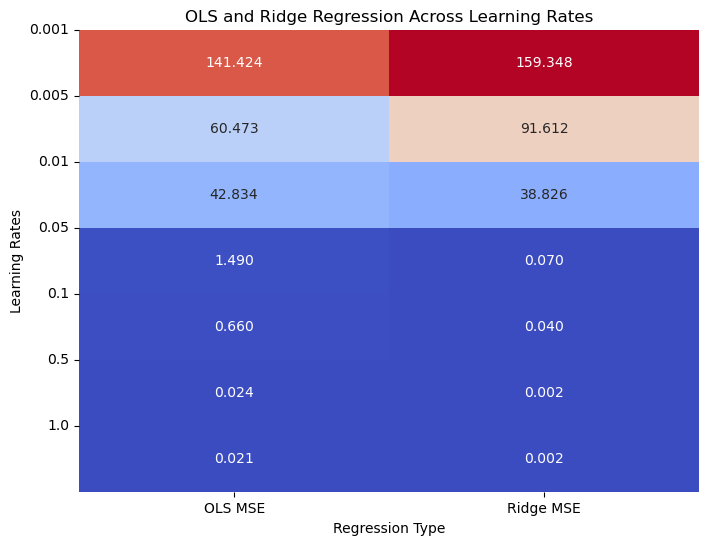

In [97]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

#Set-up taken from lecture notes
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+5*x*x

N_iterations = 100

linear_regression = LinearRegression(x, y)

#Gradient descent
learning_rates = np.array([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])
mse_data = np.zeros((len(learning_rates), 2))  # Rows for learning rates, columns for OLS and Ridge
for i, eta in enumerate(learning_rates):
    #OLS
    ols_mse = linear_regression.gradient_descent(LinearRegressionModel.OrdinaryLeastSquares, n, N_iterations, eta)
    mse_data[i, 0] = ols_mse
    ridge_mse = linear_regression.gradient_descent(LinearRegressionModel.Ridge, n, N_iterations, eta, Lambda=0.01)
    mse_data[i, 1] = ridge_mse

    print(f"MSE from gradient descent OLS: {ols_mse}")
    print(f"MSE from gradient descent Ridge: {ridge_mse}")
    print()

# Create a DataFrame for heatmap plotting
mse_df = pd.DataFrame(mse_data, columns=['OLS MSE', 'Ridge MSE'], index=learning_rates)

# Plot the heatmap
plt.figure(figsize=(8, 6))
#sns.heatmap(mse_df, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'MSE'})
sns.heatmap(mse_df, annot=True, fmt=".3f", cmap="coolwarm", cbar=False)
plt.title("OLS and Ridge Regression Across Learning Rates")
plt.xlabel("Regression Type")
plt.ylabel("Learning Rates")
plt.xticks(ticks=np.arange(0.5, 2), labels=mse_df.columns, rotation=0)
plt.yticks(ticks=np.arange(len(learning_rates)), labels=mse_df.index, rotation=0)
plt.show()


